# Copulas Distribution Simulation

Problem Set:

Recall that a bivariate copula $C(x, y)$ is the joint distribution function of two uniform random numbers. In the numerical experiments, you will implement several copulas and compare the dependence structures generated by these copulas.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
import scipy.stats as stats
import time

## (a)

Implement a function that can generate i.i.d. samples of $(U1, U2)$ ~ $C(x, y)$ where $C(x, y)$ is a Gaussian copula induced by two standard normal random variables $W_1$ and $W_2$ with correlation coefficient $\rho$. The parameter $\rho$ should be part of inputs of your function.

In [22]:
# Use A-R algorithm to Generate Normal Random Variables, i.e. W_1 & W_2

def random_normal(n): # n is the size of RVs to generate
    x = [] #output list
    while len(x) < n:
        U = np.random.uniform(0,1)
        Z = np.random.laplace(0,1,1) # Sample from Laplace as proposed distribution to similuate normal distribution 
        f_Z = stats.norm.pdf(Z) # f(x)
        g_Z = 0.5 * np.exp(-abs(Z)) #g(x)

        # Set constant c to normalize max(ratio), to ensure AR algpithm to work effectively (ratio smaller than 1)
        c = 2 * (2 * math.pi) ** (-0.5) * math.e ** 0.5

        if U <= f_Z / (c*g_Z):
            x.append(Z[0]) 
    return x


In [23]:
# Generate Gaussian Copula
def random_GaussCopula(rho,n):
    # Cholesky decomposition of the correlation matrix
    Sigma = np.array([[1, rho], [rho, 1]])
    C = np.linalg.cholesky(Sigma)

    U = np.zeros((n,2))
    for i in range(n):
        Z = np.array(random_normal(2)) # Generate 2 standard normal RVs
        W = C @ Z.T # Cholesky Transformation
        U[i] = [stats.norm.cdf(W[0]), stats.norm.cdf(W[1])]  # Map to uniform using CDF
    return U

In [24]:
random_GaussCopula(0.5,10)

array([[0.55033481, 0.758224  ],
       [0.74799332, 0.07473425],
       [0.14512345, 0.16823934],
       [0.47291301, 0.09914249],
       [0.79745701, 0.06615321],
       [0.1894941 , 0.37004078],
       [0.7499335 , 0.93913124],
       [0.46299521, 0.4977187 ],
       [0.05821931, 0.58984156],
       [0.87805474, 0.93924316]])

## (b)

Estimated the covariance $Cov(U1, U2)$ using your simulation function with 10,000 repetitions for $\rho ∈ \{±0.8, ±0.6, ±0.4, ±0.2\}$. Produce scatter plots for $U_1$ and $U_2$ with $\rho ∈ \{-0.6, 0, 0.6\}$ and 100 sample points. 

In [ ]:
lst_rho = [-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8]

for rho in lst_rho:
    samples = random_GaussCopula(rho,10000)
    cov = np.cov(samples.T)[0,1].round(6)
    print('The estimated coveriance under correlation coefficient {} is {}.'.format(rho,cov))
    print()


The estimated coveriance under correlation coefficient -0.8 is -0.064645.

The estimated coveriance under correlation coefficient -0.6 is -0.04867.

The estimated coveriance under correlation coefficient -0.4 is -0.0324.

The estimated coveriance under correlation coefficient -0.2 is -0.015664.

The estimated coveriance under correlation coefficient 0.2 is 0.015444.

The estimated coveriance under correlation coefficient 0.4 is 0.032344.

The estimated coveriance under correlation coefficient 0.6 is 0.047936.

The estimated coveriance under correlation coefficient 0.8 is 0.065289.



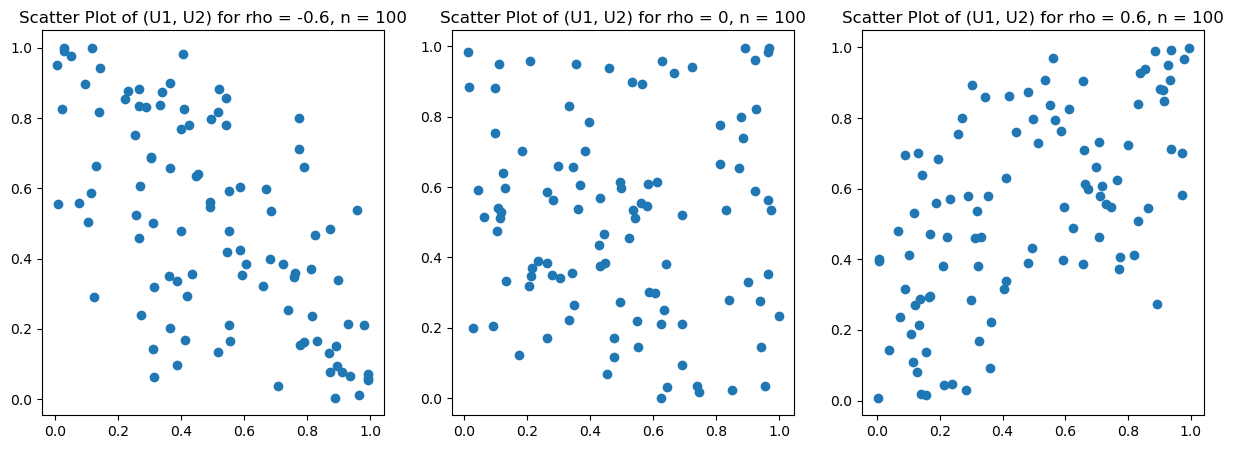

In [27]:
lst_rho = [-0.6, 0, 0.6]
n = 100

lst_u = [random_GaussCopula(rho, n) for rho in lst_rho]

plt.figure(figsize=[15, 5])

# Create subplots and scatter plots
for i, (u, rho) in enumerate(zip(lst_u, lst_rho), 1):
    ax = plt.subplot(1, 3, i)  # Create a subplot for each case
    plt.scatter(u.T[0], u.T[1])  # Scatter plot
    plt.title(f"Scatter Plot of (U1, U2) for rho = {rho}, n = {n}")

## (c)

Use the Copula to generate copies of two dependent exponential random variables $X_1$ and $X_2$, both of which have rate 1.

For exponential distribution with rate = 1, the inverse CDF would be: $F^{-1}(u)=-\ln(1-u)$

Use Copula distribution to generate exponential RVs $X_1$ and $X_2$, the RV would simply calcualted by applying the Copula U into its inverse function.

In [28]:
def random_exp(rho,n):
    x = np.zeros((n,2))
    for i in range(n):
        U = np.array(random_GaussCopula(rho,1))
        x[i] = - np.log(np.array([1,1])-U)
    return x

In [29]:
random_exp(0.5,10)

array([[1.46752541, 0.93943399],
       [1.94353873, 1.4479642 ],
       [2.98702665, 0.45774142],
       [1.11172181, 1.1198166 ],
       [0.62059822, 1.32926345],
       [2.10851201, 1.73343662],
       [1.59463567, 1.11968261],
       [0.07674912, 1.02781266],
       [1.97260796, 3.82050763],
       [0.8292946 , 0.62738789]])

## (d)

Estimated the covariance $Cov(X1, X2)$ using your simulation function with 10,000 repetitions for $p ∈ {±0.8, ±0.6, ±0.4, ±0.2}$.

In [30]:
lst_rho = [-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8]

for rho in lst_rho:
    samples = random_exp(rho,10000)
    cov = np.cov(samples.T)[0,1].round(6)
    print('The estimated coveriance under correlation coefficient {} is {}.'.format(rho,cov))
    print()


The estimated coveriance under correlation coefficient -0.8 is -0.536889.

The estimated coveriance under correlation coefficient -0.6 is -0.438738.

The estimated coveriance under correlation coefficient -0.4 is -0.304481.

The estimated coveriance under correlation coefficient -0.2 is -0.162765.

The estimated coveriance under correlation coefficient 0.2 is 0.175175.

The estimated coveriance under correlation coefficient 0.4 is 0.336091.

The estimated coveriance under correlation coefficient 0.6 is 0.558405.

The estimated coveriance under correlation coefficient 0.8 is 0.733588.



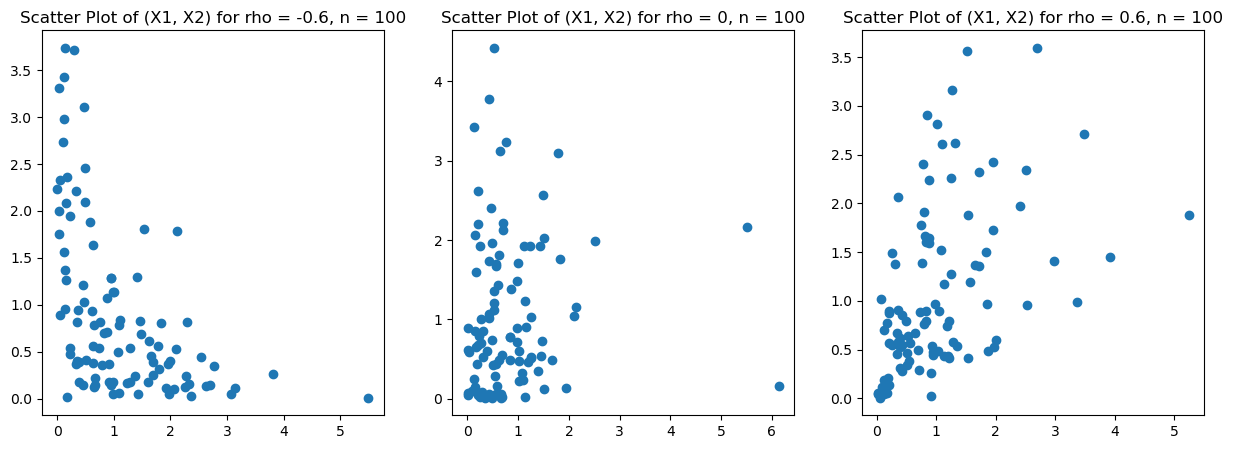

In [31]:
lst_rho = [-0.6, 0, 0.6]
n = 100

lst_x = [random_exp(rho, n) for rho in lst_rho]

plt.figure(figsize=[15, 5])

# Create subplots and scatter plots
for i, (x, rho) in enumerate(zip(lst_x, lst_rho), 1):
    ax = plt.subplot(1, 3, i)  # Create a subplot for each case
    plt.scatter(x.T[0], x.T[1])  # Scatter plot
    plt.title(f"Scatter Plot of (X1, X2) for rho = {rho}, n = {n}")